# Bikeweatherstudy

Target is to find out which weather phenomenon affects biking most.

And then some.


### 1. Load bikeweather dataset

#### NOTE: Add your own file path into the code!

Kaisaniemi weather and biking data combined.
The whole year 2019 is stored in daylight savings time (kesäajassa).

Actual summer time was as follows:

su  31.3. klo 3.00 -> 4.00	
su 27.10. klo 4.00 -> 3.00

### Imports and input file

There is 8760 lines of data, as many as hours in the year 2019.

Rename index column to hourNo.

Change name of the bike column shorter.

Add column 'Daylight' to indicate daylight savings time.


In [108]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Add your own datafile path below.
mypath = r'<Your path here>\bikeweather-2019-insummertime.csv'
# mypath = r"<Your path here>\kaisaniemi_summer_combined.csv"
print(mypath)
print()
df = pd.read_csv(mypath)
print(df.columns)
print()

#print(df.iloc[2140,0:2])  # su 31 maalis 2019 04:00
#print(df.iloc[7180,0:2])  # su 27 loka 2019 04:00

df.rename(columns={'Unnamed: 0':'hourNo'}, inplace=True)
df.rename(columns={'Kaisaniemi/Eläintarhanlahti':'KaisaniemiBikes'}, inplace=True)
df['Daylight'] = ((df.hourNo > 2139) & (df.hourNo < 7180))

#print(df.dtypes)
print(df.columns)
print()
print("Pandas shape (lines/columns): ",df.shape)
print()
print(df.iloc[0:2,0:6])
print(df.iloc[0:2,6:15])
print(df.iloc[0:2,15:20])
print()
print(df.iloc[8758:8760,0:5])  # last datum is at 23, Dec 31.

C:\Users\kojal\pyharj\IDS-harj\Groupwork\bikeweather-2019-insummertime.csv

Index(['Unnamed: 0', 'Päivämäärä', 'Kaisaniemi/Eläintarhanlahti', 'weekday',
       'day', 'year', 'hour', 'month', 'Clouds', 'AirPhPa', 'RHpercent',
       'RainmmH', 'Snowcm', 'ToC', 'DewToC', 'Visibilitym', 'Winddirdeg',
       'Gustms', 'Windms'],
      dtype='object')

Index(['hourNo', 'Päivämäärä', 'KaisaniemiBikes', 'weekday', 'day', 'year',
       'hour', 'month', 'Clouds', 'AirPhPa', 'RHpercent', 'RainmmH', 'Snowcm',
       'ToC', 'DewToC', 'Visibilitym', 'Winddirdeg', 'Gustms', 'Windms',
       'Daylight'],
      dtype='object')

Pandas shape (lines/columns):  (8760, 20)

   hourNo             Päivämäärä  KaisaniemiBikes weekday  day  year
0       0  ti 1 tammi 2019 00:00                2      ti    1  2019
1       1  ti 1 tammi 2019 01:00                1      ti    1  2019
   hour  month  Clouds  AirPhPa  RHpercent  RainmmH  Snowcm  ToC  DewToC
0     0      1       7   1008.0         88      0.0    

## 2. Some basic characteristics of data

Snowdays, raindays, no bikes on road

Check the difference between weekends and workdays.

Check the difference between daylight savings time and winter.
Find that workday time distribution is the same in winter as as summer.
This verifies/clarifies that time data is well handled.!!!

Some test graph on May 1, May 2


snow = 0:  2900
snow > 0:  1877
snow < 0:  3983
no rain:   8109
rainy h:   651
no bikes:  628

   hourNo             Päivämäärä  KaisaniemiBikes weekday  day  year
3       3  ti 1 tammi 2019 03:00                0      ti    1  2019
4       4  ti 1 tammi 2019 04:00                0      ti    1  2019
5       5  ti 1 tammi 2019 05:00                0      ti    1  2019
8       8  ti 1 tammi 2019 08:00                0      ti    1  2019
   hour  month  Clouds  AirPhPa  RHpercent  RainmmH  Snowcm  ToC
3     3      1       8   1000.9         94     0.05       2  1.4
4     4      1       8    998.7         95     0.02       2  2.0
5     5      1       8    996.5         96     0.00       0  2.5
8     8      1       8    990.0         97     0.00       0  3.1

weekend:  2496


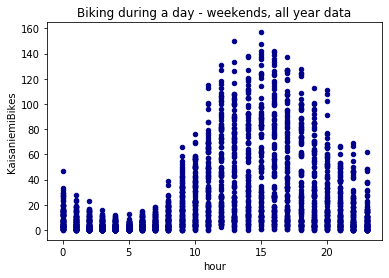

no weekend:  6264


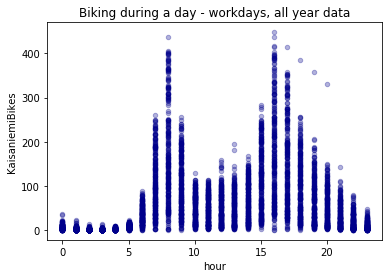

In [145]:

sm1 = df.Snowcm == 0
print("snow = 0: ",sm1.sum())
sm1 = df.Snowcm > 0
print("snow > 0: ",sm1.sum())
sm1 = df.Snowcm < 0
print("snow < 0: ",sm1.sum())

norain = df.RainmmH == 0
print("no rain:  ",norain.sum())
rainy = df.RainmmH != 0
print("rainy h:  ",rainy.sum())
nobikes = df.KaisaniemiBikes == 0
print("no bikes: ",nobikes.sum())
print()

print(df[nobikes].iloc[0:4,0:6])
print(df[nobikes].iloc[0:4,6:14])
print()

#x1 = norain.RainmmH.plot.hist()    
#plt.show()

weekend = ((df.weekday == 'su') | (df.weekday == 'la'))
print("weekend: ",weekend.sum())
ax1 = df[weekend].plot.scatter(x='hour', y='KaisaniemiBikes', c='DarkBlue')  
plt.title("Biking during a day - weekends, all year data")
plt.show()

noweekend = ((df.weekday != 'su') & (df.weekday != 'la'))
print("no weekend: ",noweekend.sum())
ax2 = df[noweekend].plot.scatter(x='hour', y='KaisaniemiBikes', c='DarkBlue') 
#ax2 = df[noweekend].plot.scatter(x='hour', y='KaisaniemiBikes', c='DarkBlue', alpha = 0.3) 
plt.title("Biking during a day - workdays, all year data")
plt.show()



### Winter time vs. summer time

The next two plots just show that winter time is in the right place!
People go work at the same time as during summer as during winter, maximum at 8:00



no weekend:  6264


C:\Users\kojal\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


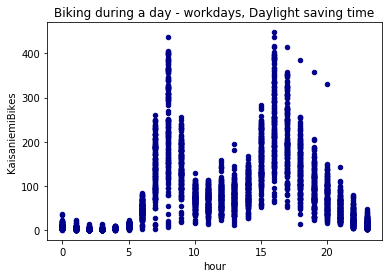

no weekend:  6264


C:\Users\kojal\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


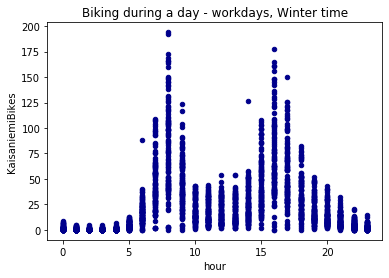

In [146]:
noweekend = ((df.weekday != 'su') & (df.weekday != 'la'))
print("no weekend: ",noweekend.sum())
ax1 = df[noweekend][df.Daylight==True].plot.scatter(x='hour', y='KaisaniemiBikes', c='DarkBlue')
plt.title("Biking during a day - workdays, Daylight saving time")
plt.show()

# Tried this, too, but this was not the best setting
# import seaborn as sns
# sns.regplot(x=df.hour, y=df.KaisaniemiBikes, data=df[noweekend][df.Daylight==True], color="Blue", scatter_kws={'alpha':0.1})
# plt.show()
# print()

print("no weekend: ",noweekend.sum())
ax2 = df[noweekend][df.Daylight==False].plot.scatter(x='hour', y='KaisaniemiBikes', c='DarkBlue')
plt.title("Biking during a day - workdays, Winter time")
plt.show()


### Months
Check overall monthly dependence of biking. (Citybike period becomes clearly visible!)
Very rough level check on how rainy weather affects.

Later, study only time 8, maybe no need to combine times 7,8,9 into one group.

C:\Users\kojal\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


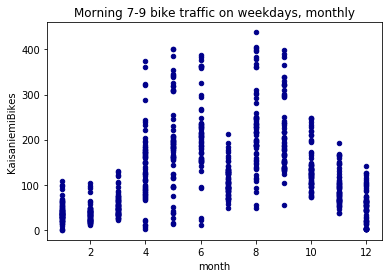

C:\Users\kojal\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


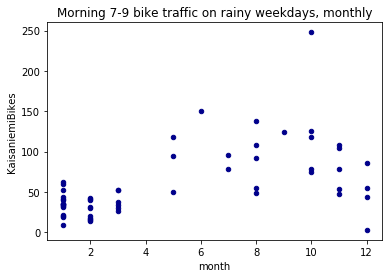

C:\Users\kojal\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


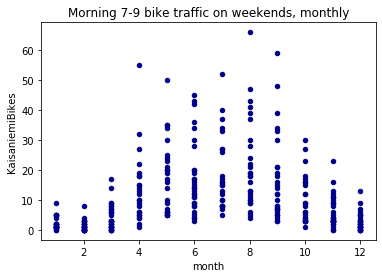

C:\Users\kojal\anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


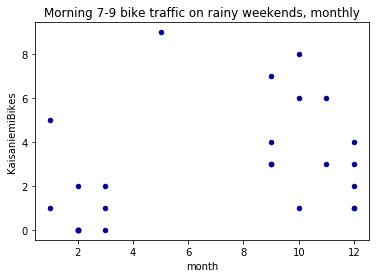

In [111]:
noweekend = ((df.weekday != 'su') & (df.weekday != 'la'))
h7to9 = ((df.hour == 7) | (df.hour == 8) | (df.hour == 9))
ax3 = df[h7to9][noweekend].plot.scatter(x='month', y='KaisaniemiBikes', c='DarkBlue')
plt.title('Morning 7-9 bike traffic on weekdays, monthly')
plt.show()

ax4 = df[h7to9][noweekend][rainy].plot.scatter(x='month', y='KaisaniemiBikes', c='DarkBlue')
plt.title('Morning 7-9 bike traffic on rainy weekdays, monthly')
plt.show()

#h7to9 = ((df.hour == 7) | (df.hour == 8) | (df.hour == 9))
weekend = ((df.weekday == 'su') | (df.weekday == 'la'))
ax5 = df[h7to9][weekend].plot.scatter(x='month', y='KaisaniemiBikes', c='DarkBlue')
plt.title('Morning 7-9 bike traffic on weekends, monthly')
plt.show()

ax6 = df[h7to9][weekend][rainy].plot.scatter(x='month', y='KaisaniemiBikes', c='DarkBlue')
plt.title('Morning 7-9 bike traffic on rainy weekends, monthly')
plt.show()


### May 1st
May 1st (wednesday) and May 2nd (thursday) are compared.
May 1st hourly data curve is very similar to weekend data.


May 1st biking is like a typical weekend biking data
2880     13
2881     21
2882     13
2883     13
2884      9
2885      2
2886      8
2887     14
2888     15
2889     41
2890     69
2891    107
2892    143
2893    138
2894    129
2895    121
2896    124
2897    102
2898    112
2899     41
2900     49
2901     18
2902      4
2903      4
Name: KaisaniemiBikes, dtype: int64


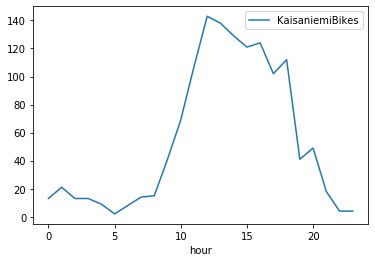

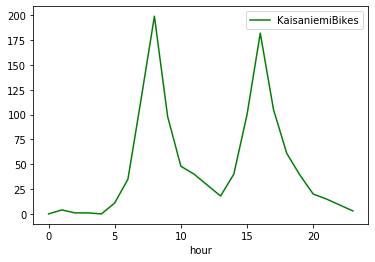

In [112]:

may1 = ((df.day == 1) &(df.month == 5))
may2 = ((df.day == 2) &(df.month == 5))
print("May 1st biking is like a typical weekend biking data")
print(df[may1].KaisaniemiBikes)

ax3 = df[may1].plot(x='hour', y='KaisaniemiBikes')
ax4 = df[may2].plot(x='hour', y='KaisaniemiBikes', c='Green')
plt.show()

### Multilinear models
First, for "experiment", check simple models with one explanatory variable.
Scatter plot each of them.

Then check multivariate models by adding one variable at a time.

"Alpha" added to two graphs that were selected into the technical report.

hourNo               int64
Päivämäärä          object
KaisaniemiBikes      int64
weekday             object
day                  int64
year                 int64
hour                 int64
month                int64
Clouds               int64
AirPhPa            float64
RHpercent            int64
RainmmH            float64
Snowcm               int64
ToC                float64
DewToC             float64
Visibilitym          int64
Winddirdeg           int64
Gustms             float64
Windms             float64
Daylight              bool
ToC2               float64
dtype: object

Clouds
Coef, Intercept:  [-4.16243459] 66.34451325454448
R2-score:  0.04431437239824754


C:\Users\kojal\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':


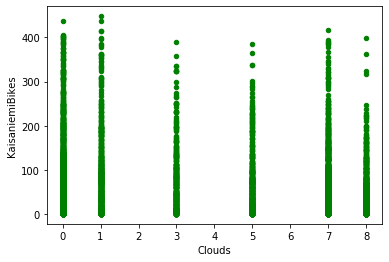


AirPhPa
Coef, Intercept:  [0.97688761] -939.1351453961724
R2-score:  0.028613834564893633


C:\Users\kojal\anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


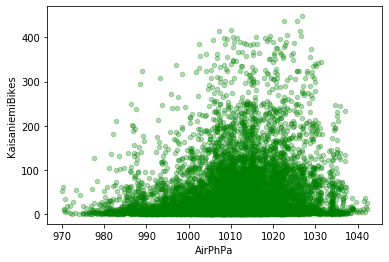


RHpercent
Coef, Intercept:  [-1.44354518] 160.13829074699407
R2-score:  0.1276802427610355


C:\Users\kojal\anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


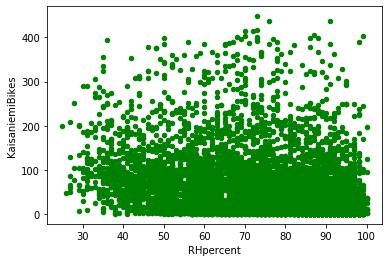


RainmmH
Coef, Intercept:  [-4.36134624] 48.58404542568234
R2-score:  0.0011062622142188339


C:\Users\kojal\anaconda3\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


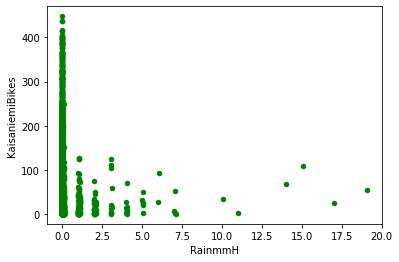


Snowcm
Coef, Intercept:  [-1.74885617] 54.38789170065084
R2-score:  0.06158910760386115


C:\Users\kojal\anaconda3\lib\site-packages\ipykernel_launcher.py:45: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


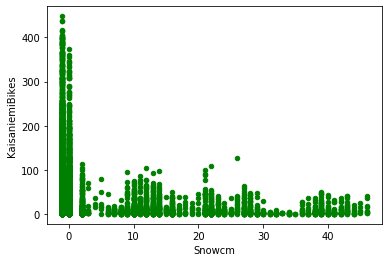


Snowcm winter
Coef, Intercept:  [-0.44796677] 22.604789365650824
R2-score:  0.04448789238726636


C:\Users\kojal\anaconda3\lib\site-packages\ipykernel_launcher.py:54: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


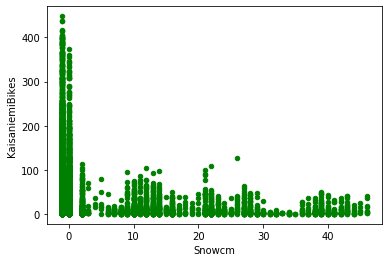


ToC
Coef, Intercept:  [3.6633383] 21.01211755785647
R2-score:  0.20119499532190355


C:\Users\kojal\anaconda3\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


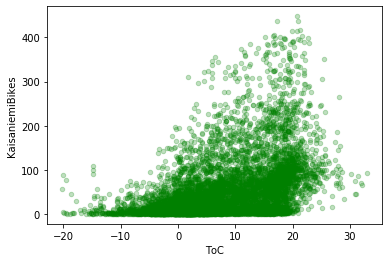


DewToC
Coef, Intercept:  [2.88270631] 39.52871863257995
R2-score:  0.09598297330392036


C:\Users\kojal\anaconda3\lib\site-packages\ipykernel_launcher.py:72: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


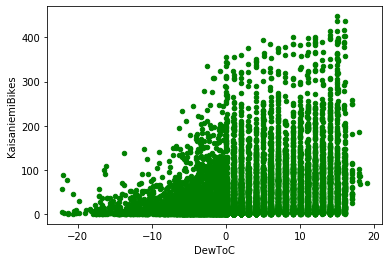


Visibilitym
Coef, Intercept:  [0.00049394] 31.305306958222577
R2-score:  0.014051479119493004


C:\Users\kojal\anaconda3\lib\site-packages\ipykernel_launcher.py:81: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


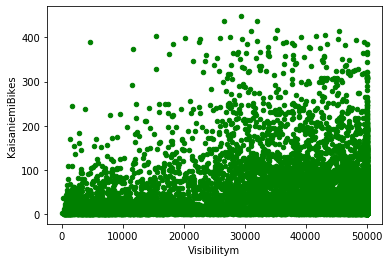


Winddirdeg
Coef, Intercept:  [-0.04023549] 56.43790071281093
R2-score:  0.003442540136461947


C:\Users\kojal\anaconda3\lib\site-packages\ipykernel_launcher.py:90: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


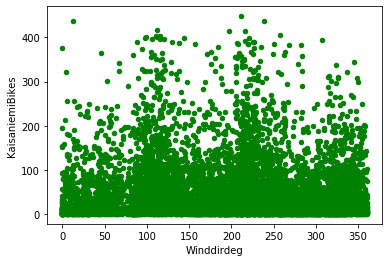


Gustms
Coef, Intercept:  [0.55553867] 45.06267236167248
R2-score:  0.0005946238353358169


C:\Users\kojal\anaconda3\lib\site-packages\ipykernel_launcher.py:99: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


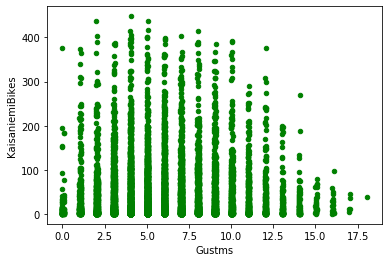


Windms
Coef, Intercept:  [1.62130719] 42.63904497337974
R2-score:  0.0018813111579586428


C:\Users\kojal\anaconda3\lib\site-packages\ipykernel_launcher.py:109: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


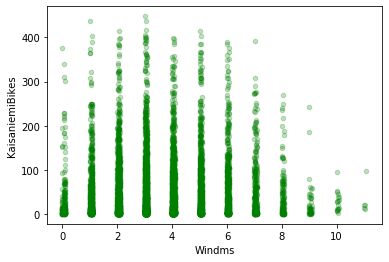

---------------------------------------------------------------------------------

1
Coef, Intercept:  [-4.16243459] 66.34451325454448
R2-score:  0.04431437239824754

2
Coef, Intercept:  [-3.42204406  0.63827767] -582.0601903648028
R2-score:  0.05512765369406203

3
Coef, Intercept:  [-0.74527868  0.18039539 -1.31956386] -28.594517722103078
R2-score:  0.12993257003367265

4
Coef, Intercept:  [-0.74936634  0.18176212 -1.32181442  0.92189535] -29.832687640473523
R2-score:  0.12998134117501736

5
Coef, Intercept:  [-0.49778558  0.10567237 -1.21183743  0.04876234 -1.24547684] 41.82208192297952
R2-score:  0.1594300240597799

6
Coef, Intercept:  [-0.13967092  0.08523898 -0.82823117 -1.7206699  -0.09282748  2.91790872] 5.562120542924916
R2-score:  0.24120061024063869

7
Coef, Intercept:  [-0.25509555  0.10346302  0.06543311 -1.97649575 -0.11714096  6.8900454
 -4.21299305] -98.21486028148233
R2-score:  0.24271879823395925

8
Coef, Intercept:  [-4.57025422e-01  1.03925886e-01 -5.72425280e-01 -3.

C:\Users\kojal\anaconda3\lib\site-packages\ipykernel_launcher.py:121: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
C:\Users\kojal\anaconda3\lib\site-packages\ipykernel_launcher.py:219: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\kojal\anaconda3\lib\site-packages\ipykernel_launcher.py:221: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\kojal\anaconda3\lib\site-packages\ipykernel_launcher.py:228: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\kojal\anaconda3\lib\site-packages\ipykernel_launcher.py:228: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\kojal\anaconda3\lib\site-packages\ipykernel_launcher.py:230: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\kojal\ana

R2-score:  0.43524807016292244

Best 3 summer (no snow)
Coef, Intercept:  [-0.90103721  2.14323139] 74.3911138382719
R2-score:  0.4344449013731767

Plotting RHpercent in winter and in summer


C:\Users\kojal\anaconda3\lib\site-packages\ipykernel_launcher.py:242: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\kojal\anaconda3\lib\site-packages\ipykernel_launcher.py:242: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\kojal\anaconda3\lib\site-packages\ipykernel_launcher.py:244: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\kojal\anaconda3\lib\site-packages\ipykernel_launcher.py:244: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


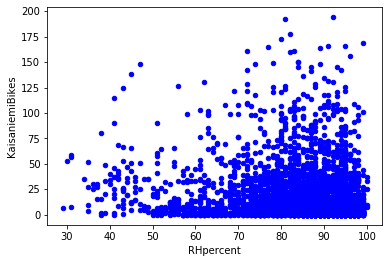

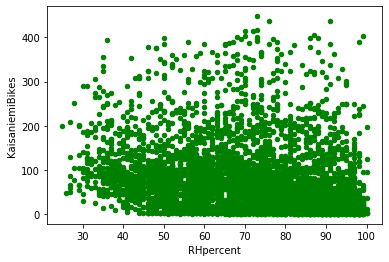

Coef, Intercept:  [0.78372606] -2.787956717974432
R2-score:  0.797256917157059
Coef, Intercept:  [-0.19233973] 22.357975629656494
R2-score:  0.1511951443700118

Some cloud correlations checked below
Coef, Intercept:  [0.10147926] -3.536227821103261
R2-score:  0.24669922168157965
Coef, Intercept:  [-0.10788218] 5.12723700548681
R2-score:  0.06822017492294219


In [150]:
import sklearn   # This imports the scikit-learn library
from sklearn.linear_model import LinearRegression
df2 = df
print(df.dtypes)

print()
print("Clouds")
model=LinearRegression(fit_intercept=True)
model.fit(df.Clouds[:,np.newaxis], df.KaisaniemiBikes)
print("Coef, Intercept: ", model.coef_, model.intercept_)
score = model.score(df[['Clouds']],df.KaisaniemiBikes)
print("R2-score: ", score)
ax = df.plot.scatter(x='Clouds', y='KaisaniemiBikes', c='Green')
plt.show()

print()
print("AirPhPa")
model.fit(df.AirPhPa[:,np.newaxis], df.KaisaniemiBikes)
print("Coef, Intercept: ", model.coef_, model.intercept_)
score = model.score(df[['AirPhPa']],df.KaisaniemiBikes)
print("R2-score: ", score)
ax = df.plot.scatter(x='AirPhPa', y='KaisaniemiBikes', c='Green', alpha = 0.3)
plt.show()

print()
print("RHpercent")
model.fit(df.RHpercent[:,np.newaxis], df.KaisaniemiBikes)
print("Coef, Intercept: ", model.coef_, model.intercept_)
score = model.score(df[['RHpercent']],df.KaisaniemiBikes)
print("R2-score: ", score)
ax = df.plot.scatter(x='RHpercent', y='KaisaniemiBikes', c='Green')
plt.show()

print()
print("RainmmH")
model.fit(df.RainmmH[:,np.newaxis], df.KaisaniemiBikes)
print("Coef, Intercept: ", model.coef_, model.intercept_)
score = model.score(df[['RainmmH']],df.KaisaniemiBikes)
print("R2-score: ", score)
ax = df.plot.scatter(x='RainmmH', y='KaisaniemiBikes', c='Green')
plt.show()

print()
print("Snowcm")
model.fit(df.Snowcm[:,np.newaxis], df.KaisaniemiBikes)
print("Coef, Intercept: ", model.coef_, model.intercept_)
score = model.score(df[['Snowcm']],df.KaisaniemiBikes)
print("R2-score: ", score)
ax = df.plot.scatter(x='Snowcm', y='KaisaniemiBikes', c='Green')
plt.show()

print()
print("Snowcm winter")
model.fit(df[df.Daylight==False].Snowcm[:,np.newaxis], df[df.Daylight==False].KaisaniemiBikes)
print("Coef, Intercept: ", model.coef_, model.intercept_)
score = model.score(df[df.Daylight==False][['Snowcm']],df[df.Daylight==False].KaisaniemiBikes)
print("R2-score: ", score)
ax = df.plot.scatter(x='Snowcm', y='KaisaniemiBikes', c='Green')
plt.show()

print()
print("ToC")
model.fit(df.ToC[:,np.newaxis], df.KaisaniemiBikes)
print("Coef, Intercept: ", model.coef_, model.intercept_)
score = model.score(df[['ToC']],df.KaisaniemiBikes)
print("R2-score: ", score)
ax = df.plot.scatter(x='ToC', y='KaisaniemiBikes', c='Green', alpha = 0.25)
plt.show()
    
print()
print("DewToC")
model.fit(df.DewToC[:,np.newaxis], df.KaisaniemiBikes)
print("Coef, Intercept: ", model.coef_, model.intercept_)
score = model.score(df[['DewToC']],df.KaisaniemiBikes)
print("R2-score: ", score)
ax = df.plot.scatter(x='DewToC', y='KaisaniemiBikes', c='Green')
plt.show()

print()
print("Visibilitym")
model.fit(df.Visibilitym[:,np.newaxis], df.KaisaniemiBikes)
print("Coef, Intercept: ", model.coef_, model.intercept_)
score = model.score(df[['Visibilitym']],df.KaisaniemiBikes)
print("R2-score: ", score)
ax = df.plot.scatter(x='Visibilitym', y='KaisaniemiBikes', c='Green')
plt.show()

print()
print("Winddirdeg")
model.fit(df.Winddirdeg[:,np.newaxis], df.KaisaniemiBikes)
print("Coef, Intercept: ", model.coef_, model.intercept_)
score = model.score(df[['Winddirdeg']],df.KaisaniemiBikes)
print("R2-score: ", score)
ax = df.plot.scatter(x='Winddirdeg', y='KaisaniemiBikes', c='Green')
plt.show()

print()
print("Gustms")
model.fit(df.Gustms[:,np.newaxis], df.KaisaniemiBikes)
print("Coef, Intercept: ", model.coef_, model.intercept_)
score = model.score(df[['Gustms']],df.KaisaniemiBikes)
print("R2-score: ", score)
ax = df.plot.scatter(x='Gustms', y='KaisaniemiBikes', c='Green')
plt.show()


print()
print("Windms")
model.fit(df.Windms[:,np.newaxis], df.KaisaniemiBikes)
print("Coef, Intercept: ", model.coef_, model.intercept_)
score = model.score(df[['Windms']],df.KaisaniemiBikes)
print("R2-score: ", score)
ax = df.plot.scatter(x='Windms', y='KaisaniemiBikes', c='Green', alpha = 0.25)
plt.show()

print("---------------------------------------------------------------------------------")

print()
print("1")
model=LinearRegression(fit_intercept=True)
model.fit(df.Clouds[:,np.newaxis], df.KaisaniemiBikes)
print("Coef, Intercept: ", model.coef_, model.intercept_)
score = model.score(df[['Clouds']],df.KaisaniemiBikes)
print("R2-score: ", score)

print()
print("2")
model.fit(df[['Clouds','AirPhPa']],df.KaisaniemiBikes)
print("Coef, Intercept: ", model.coef_, model.intercept_)
score = model.score(df[['Clouds','AirPhPa']],df.KaisaniemiBikes)
print("R2-score: ", score)

print()
print("3")
model.fit(df[['Clouds','AirPhPa','RHpercent']],df.KaisaniemiBikes)
print("Coef, Intercept: ", model.coef_, model.intercept_)
score = model.score(df[['Clouds','AirPhPa','RHpercent']],df.KaisaniemiBikes)
print("R2-score: ", score)

print()
print("4")
model.fit(df[['Clouds','AirPhPa','RHpercent','RainmmH']],df.KaisaniemiBikes)
print("Coef, Intercept: ", model.coef_, model.intercept_)
score = model.score(df[['Clouds','AirPhPa','RHpercent','RainmmH']],df.KaisaniemiBikes)
print("R2-score: ", score)

print()
print("5")
model.fit(df[['Clouds','AirPhPa','RHpercent','RainmmH','Snowcm']],df.KaisaniemiBikes)
print("Coef, Intercept: ", model.coef_, model.intercept_)
score = model.score(df[['Clouds','AirPhPa','RHpercent','RainmmH','Snowcm']],df.KaisaniemiBikes)
print("R2-score: ", score)

print()
print("6")
model.fit(df[['Clouds','AirPhPa','RHpercent','RainmmH','Snowcm','ToC']],df.KaisaniemiBikes)
print("Coef, Intercept: ", model.coef_, model.intercept_)
score = model.score(df[['Clouds','AirPhPa','RHpercent','RainmmH','Snowcm','ToC']],df.KaisaniemiBikes)
print("R2-score: ", score)

print()
print("7")
model.fit(df[['Clouds','AirPhPa','RHpercent','RainmmH','Snowcm','ToC','DewToC']],df.KaisaniemiBikes)
print("Coef, Intercept: ", model.coef_, model.intercept_)
score = model.score(df[['Clouds','AirPhPa','RHpercent','RainmmH','Snowcm','ToC','DewToC']],df.KaisaniemiBikes)
print("R2-score: ", score)

print()
print("8")
model.fit(df[['Clouds','AirPhPa','RHpercent','RainmmH','Snowcm','ToC','DewToC','Visibilitym']],df.KaisaniemiBikes)
print("Coef, Intercept: ", model.coef_, model.intercept_)
score = model.score(df[['Clouds','AirPhPa','RHpercent','RainmmH','Snowcm','ToC','DewToC','Visibilitym']],df.KaisaniemiBikes)
print("R2-score: ", score)

print()
print("9")
model.fit(df[['Clouds','AirPhPa','RHpercent','RainmmH','Snowcm','ToC','DewToC','Visibilitym','Winddirdeg']],df.KaisaniemiBikes)
print("Coef, Intercept: ", model.coef_, model.intercept_)
score = model.score(df[['Clouds','AirPhPa','RHpercent','RainmmH','Snowcm','ToC','DewToC','Visibilitym','Winddirdeg']],df.KaisaniemiBikes)
print("R2-score: ", score)

print()
print("10")
model.fit(df[['Clouds','AirPhPa','RHpercent','RainmmH','Snowcm','ToC','DewToC','Visibilitym','Winddirdeg','Gustms']],df.KaisaniemiBikes)
print("Coef, Intercept: ", model.coef_, model.intercept_)
score = model.score(df[['Clouds','AirPhPa','RHpercent','RainmmH','Snowcm','ToC','DewToC','Visibilitym','Winddirdeg','Gustms']],df.KaisaniemiBikes)
print("R2-score: ", score)

print()
print("11")
model.fit(df[['Clouds','AirPhPa','RHpercent','RainmmH','Snowcm','ToC','DewToC','Visibilitym','Winddirdeg','Gustms','Windms']],df.KaisaniemiBikes)
print("Coef, Intercept: ", model.coef_, model.intercept_)
score = model.score(df[['Clouds','AirPhPa','RHpercent','RainmmH','Snowcm','ToC','DewToC','Visibilitym','Winddirdeg','Gustms','Windms']],df.KaisaniemiBikes)
print("R2-score: ", score)

print()
print("Best 3 all")
model.fit(df[['RHpercent','Snowcm','ToC']],df.KaisaniemiBikes)
print("Coef, Intercept: ", model.coef_, model.intercept_)
score = model.score(df[['RHpercent','Snowcm','ToC']],df.KaisaniemiBikes)
print("R2-score: ", score)

print()
print("Best 3 weekend")
model.fit(df[weekend][['RHpercent','Snowcm','ToC']],df[weekend].KaisaniemiBikes)
print("Coef, Intercept: ", model.coef_, model.intercept_)
score = model.score(df[weekend][['RHpercent','Snowcm','ToC']],df[weekend].KaisaniemiBikes)
print("R2-score: ", score)

print()
print("Best 3 no weekend")
model.fit(df[noweekend][['RHpercent','Snowcm','ToC']],df[noweekend].KaisaniemiBikes)
print("Coef, Intercept: ", model.coef_, model.intercept_)
score = model.score(df[noweekend][['RHpercent','Snowcm','ToC']],df[noweekend].KaisaniemiBikes)
print("R2-score: ", score)

print()
print("Best 3")
model.fit(df[noweekend][h7to9][['RHpercent','Snowcm','ToC']],df[h7to9][noweekend].KaisaniemiBikes)
print("Coef, Intercept: ", model.coef_, model.intercept_)
score = model.score(df[h7to9][noweekend][['RHpercent','Snowcm','ToC']],df[h7to9][noweekend].KaisaniemiBikes)
print("R2-score: ", score)

h0to5 = ((df.hour >= 0) & (df.hour <= 5))

print()
print("Best 3 winter")
model.fit(df[df.Daylight==False][weekend][['RHpercent','Snowcm','ToC']],df[df.Daylight==False][weekend].KaisaniemiBikes)
print("Coef, Intercept: ", model.coef_, model.intercept_)
score = model.score(df[df.Daylight==False][weekend][['RHpercent','Snowcm','ToC']],df[df.Daylight==False][weekend].KaisaniemiBikes)
print("R2-score: ", score)

print()
print("Best 3 summer")
model.fit(df[df.Daylight==True][weekend][['RHpercent','Snowcm','ToC']],df[df.Daylight==True][weekend].KaisaniemiBikes)
print("Coef, Intercept: ", model.coef_, model.intercept_)
score = model.score(df[df.Daylight==True][weekend][['RHpercent','Snowcm','ToC']],df[df.Daylight==True][weekend].KaisaniemiBikes)
print("R2-score: ", score)

print()
print("Best 3 summer (no snow)")
model.fit(df[df.Daylight==True][weekend][['RHpercent','ToC']],df[df.Daylight==True][weekend].KaisaniemiBikes)
print("Coef, Intercept: ", model.coef_, model.intercept_)
score = model.score(df[df.Daylight==True][weekend][['RHpercent','ToC']],df[df.Daylight==True][weekend].KaisaniemiBikes)
print("R2-score: ", score)

print()
print("Plotting RHpercent in winter and in summer")
ax1 = df[df.Daylight==False].plot.scatter(x='RHpercent', y='KaisaniemiBikes', c='Blue')
plt.show()
ax2 = df[df.Daylight==True].plot.scatter(x='RHpercent', y='KaisaniemiBikes', c='Green')
plt.show()

model.fit(df[['ToC']], df.DewToC)
print("Coef, Intercept: ", model.coef_, model.intercept_)
score = model.score(df[['ToC']],df.DewToC)
print("R2-score: ", score)

model.fit(df[['RHpercent']], df.ToC)
print("Coef, Intercept: ", model.coef_, model.intercept_)
score = model.score(df[['RHpercent']],df.ToC)
print("R2-score: ", score)

print()
print("Some cloud correlations checked below")

model.fit(df[['RHpercent']], df.Clouds)
print("Coef, Intercept: ", model.coef_, model.intercept_)
score = model.score(df[['RHpercent']],df.Clouds)
print("R2-score: ", score)

model.fit(df[['ToC']], df.Clouds)
print("Coef, Intercept: ", model.coef_, model.intercept_)
score = model.score(df[['ToC']],df.Clouds)
print("R2-score: ", score)

### Group by hours


df2 = df
df2.groupby(['hour'])
model.fit(df2[['hour']], df2.KaisaniemiBikes)
print("Coef, Intercept: ", model.coef_, model.intercept_)
score = model.score(df2[['hour']],df2.KaisaniemiBikes)
print("R2-score: ", score)
print()
print("Some additional test graphs")

df2[df.Daylight==False].groupby(['hour'])['KaisaniemiBikes'].mean().plot()
df2[df.Daylight==True].groupby(['hour'])['KaisaniemiBikes'].mean().plot()
plt.show()
df2.groupby(['month','hour'])['KaisaniemiBikes'].mean().plot()
plt.show()
df2.groupby(['hour','month'])['KaisaniemiBikes'].mean().plot()

### Some trials
Heatmap first quick try and 

seaborn graph with alpha


<bound method NDFrame.head of             hourNo  KaisaniemiBikes   day    year    Clouds      AirPhPa  \
hour month                                                                 
0    1       360.0         1.161290  16.0  2019.0  5.483871  1004.322581   
     2      1068.0         1.107143  14.5  2019.0  5.642857  1012.003571   
     3      1776.0         1.774194  16.0  2019.0  4.774194  1002.441935   
     4      2508.0         4.966667  15.5  2019.0  2.466667  1024.240000   
     5      3240.0        11.806452  16.0  2019.0  3.838710  1011.929032   
...            ...              ...   ...     ...       ...          ...   
23   8      5471.0        18.677419  16.0  2019.0  2.387097  1014.348387   
     9      6203.0        11.233333  15.5  2019.0  3.866667  1011.523333   
     10     6935.0         6.096774  16.0  2019.0  5.161290  1009.400000   
     11     7667.0         3.733333  15.5  2019.0  6.433333  1012.706667   
     12     8399.0         3.096774  16.0  2019.0  6.06451

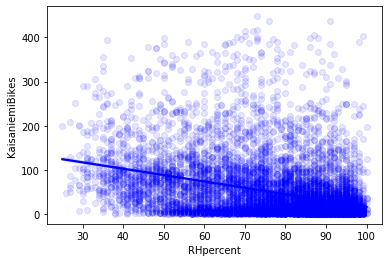

In [141]:
# A simple try on heatmaps - not succesful (not much time..)

dfx = df2.groupby(['hour', 'month']).mean()
z_min, z_max = 0, dfx.KaisaniemiBikes.max()
print(dfx.head)
print(z_min, z_max)
#fig, ax = plt.subplots()
#c = ax.pcolormesh(df2.hour, df2.month, dfx.KaisaniemiBikes,cmap='RdBu', vmin=z_min, vmax=z_max)
#ax.axis([dfx.hour.min(), dfx.hour.max(), dfx.month.min(), dfx.month.max()])
#fig.colorbar(c, ax=ax)
#plt.show()


import seaborn as sns
sns.regplot(x=df.RHpercent, y=df.KaisaniemiBikes, data=df, color="Blue", scatter_kws={'alpha':0.1})
#sns.regplot(x="Hours", y="Salary", data=data[data["Gender"]==0], color="darkOrange", scatter_kws={'alpha':0.5})
#sns.regplot(x="Hours", y="Salary", data=data, marker="None", color="red")
plt.show()
print()

### Trying non-linear model on temperature
It works, but did not improve R2

In [122]:
print()
print("T squared model")
model_squared=LinearRegression(fit_intercept=True)
df['ToC2'] = df.ToC * df.ToC
print(df.columns)
model_squared.fit(df[['ToC','ToC2']],df.KaisaniemiBikes)


print("Coef, Intercept: ", model_squared.coef_,model_squared.intercept_)
score = model_squared.score(df[['ToC','ToC2']],df.KaisaniemiBikes)
print("R2-score: ", score)





T squared model
Index(['hourNo', 'Päivämäärä', 'KaisaniemiBikes', 'weekday', 'day', 'year',
       'hour', 'month', 'Clouds', 'AirPhPa', 'RHpercent', 'RainmmH', 'Snowcm',
       'ToC', 'DewToC', 'Visibilitym', 'Winddirdeg', 'Gustms', 'Windms',
       'Daylight', 'ToC2'],
      dtype='object')
Coef, Intercept:  [2.12998833 0.10202223] 19.94415972489195
R2-score:  0.21668106091541037


### 'Clouds'
Checked if including 'Clouds' made any difference. It did not.

In [131]:
print()
print("Best 3 all")
model.fit(df[['RHpercent','Clouds','ToC']],df.KaisaniemiBikes)
print("Coef, Intercept: ", model.coef_, model.intercept_)
score = model.score(df[['RHpercent','Clouds','ToC']],df.KaisaniemiBikes)
print("R2-score: ", score)

print()
print("Best 3 weekend")
model.fit(df[weekend][['RHpercent','Clouds','ToC']],df[weekend].KaisaniemiBikes)
print("Coef, Intercept: ", model.coef_, model.intercept_)
score = model.score(df[weekend][['RHpercent','Clouds','ToC']],df[weekend].KaisaniemiBikes)
print("R2-score: ", score)

print()
print("Best 3 no weekend")
model.fit(df[noweekend][['RHpercent','Clouds','ToC']],df[noweekend].KaisaniemiBikes)
print("Coef, Intercept: ", model.coef_, model.intercept_)
score = model.score(df[noweekend][['RHpercent','Clouds','ToC']],df[noweekend].KaisaniemiBikes)
print("R2-score: ", score)

print()
print("Best 2 all")
model.fit(df[['RHpercent','ToC']],df.KaisaniemiBikes)
print("Coef, Intercept: ", model.coef_, model.intercept_)
score = model.score(df[['RHpercent','ToC']],df.KaisaniemiBikes)
print("R2-score: ", score)

print()
print("Best 2 weekend")
model.fit(df[weekend][['RHpercent','ToC']],df[weekend].KaisaniemiBikes)
print("Coef, Intercept: ", model.coef_, model.intercept_)
score = model.score(df[weekend][['RHpercent','ToC']],df[weekend].KaisaniemiBikes)
print("R2-score: ", score)


Best 3 all
Coef, Intercept:  [-0.8499278  -0.21698231  2.97181532] 92.92721733639983
R2-score:  0.24070109496492545

Best 3 weekend
Coef, Intercept:  [-0.77969728  0.05064821  1.7051633 ] 71.34510354447761
R2-score:  0.523637329886614

Best 3 no weekend
Coef, Intercept:  [-0.82588544 -0.44286522  3.54623459] 97.64443824726834
R2-score:  0.24981749973856415

Best 2 all
Coef, Intercept:  [-0.87056484  2.97900141] 93.53384983033077
R2-score:  0.24061103966907804

Best 2 weekend
Coef, Intercept:  [-0.77516675  1.70294652] 71.22730807419634
R2-score:  0.5236138899611373
